Neural net number:  0  Hidden Nodes:  5
Testing against noise level:  0.0
7/7 [==============================] - 0s 2ms/step - loss: 1.7897 - accuracy: 0.6129
Testing against noise level:  0.5
7/7 [==============================] - 0s 3ms/step - loss: 1.8015 - accuracy: 0.6129
Testing against noise level:  1.0
7/7 [==============================] - 0s 2ms/step - loss: 1.8050 - accuracy: 0.6129
Testing against noise level:  1.5
7/7 [==============================] - 0s 3ms/step - loss: 1.8441 - accuracy: 0.5806
Testing against noise level:  2.0
7/7 [==============================] - 0s 3ms/step - loss: 1.8423 - accuracy: 0.5806
Testing against noise level:  2.5
7/7 [==============================] - 0s 2ms/step - loss: 1.8916 - accuracy: 0.5484
Testing against noise level:  3.0
7/7 [==============================] - 0s 3ms/step - loss: 1.9139 - accuracy: 0.4516
Neural net number:  1  Hidden Nodes:  10
Testing against noise level:  0.0
7/7 [==============================] - 0s 3ms/step -

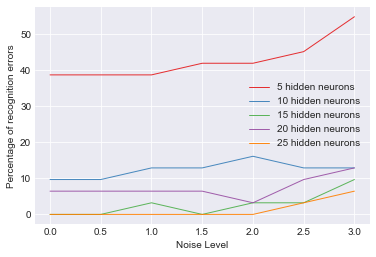

In [1]:
import numpy    as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from math import floor
from random import random
from random import randint
from copy import deepcopy

def nData(data, x):
    data = deepcopy(data)
    noisyData = []
    for i in range(0, len(data)):               
        noisyData.append(np.asarray(data[i:i+1, :])[0:1][0])  
        noisyPixels = floor(x)
        r = random()
        if (r < (x - floor(x))): 
            noisyPixels += 1
        fliped = [0]*noisyData[i].size          
        for j in range (0, noisyPixels):        
            noise = randint(0, len(noisyData[i])-1) 
            while(fliped[noise] == 1):          
                noise = randint(0, len(noisyData[i])-1)
            fliped[noise] = 1
            if (noisyData[i][noise] == '1'):          
                noisyData[i][noise] = '0'
            else:
                noisyData[i][noise] = '1'

    return np.mat(noisyData)

readFile = open("dataSet.txt", "r")
s=[]
l=[]
for line in readFile:
    if (line == "\n"):
        s.append(l)
        l = []
    else:
        for char in line:
            if (char != "\n"):
                l.append(char)
if (l != []):
    s.append(l)
#inputFile = "dataSet.txt"
#data = process.load(inputFile)
data = np.mat(s)
layerSizes = [35, 10, 31]
label = []
noisyData = []
noisyLabel = []

for i in range (0, len(data)):
    a = [0]*len(data)
    a[i] = 1
    label.append(a)
label = np.mat(label)
data = data.astype('float32')
label = label.astype('float32')


for i in range (0, 7):
    noisyData.append(nData(data, i/2))
    noisyLabel.append(label)

model = []
neuron = [5, 10, 15, 20, 25]
for n in range(0, 5):
    layerSizes[1] = neuron[n]
    model.append(keras.Sequential())
    for i in range(0, len(layerSizes)):
        model[n].add(keras.layers.Dense(layerSizes[i], activation="sigmoid", kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.15)))

    model[n].compile(optimizer=Adam(0.001), 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    for i in range (0, 7): 
        model[n].fit(noisyData[i], noisyLabel[i], epochs=1, batch_size=5, verbose=0)

for i in range(0, 100):
    for n in range(0, 5):
        noisyData = []
        for j in range (0, 7):
            noisyData.append(nData(data, j/2))
        for j in range (0, 7): 
                model[n].fit(noisyData[j], noisyLabel[j], epochs=1, batch_size=5, verbose=0)

noisyData = []
for i in range (0, 7): 
    noisyData.append(nData(data, i/2))

results = []
for n in range(0, 5):
    print ("Neural net number: ", n, " Hidden Nodes: ", neuron[n])
    results.append([])
    for i in range (0, 7):
        print ("Testing against noise level: ", i/2)
        results[n].append(model[n].evaluate(noisyData[i], noisyLabel[i], batch_size=5))


x = []
y = []
l = []
for n in range(0, 5):
    x.append([])
    y.append([])
    l.append(str(neuron[n]) + " hidden neurons")
    for noiseLvl in range(0, 7):
        x[n].append(noiseLvl/2)
        y[n].append((1-results[n][noiseLvl][1])*100)

plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
plt.xlabel("Noise Level")
plt.ylabel("Percentage of recognition errors")

for i in range(0, len(x)):
    plt.plot(x[i], y[i], marker='', color=palette(i), linewidth=1, alpha=0.9, label=l[i])
plt.legend()
plt.show()